In [1]:
import pandas as pd
import numpy as np


In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
df = pd.read_csv('Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df1 = pd.get_dummies(df.Geography)
df1 = df1*1
df1

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [8]:
df = pd.concat([df,df1], axis='columns')

In [9]:
df.shape

(10000, 17)

In [10]:
df.drop(['CustomerId','Surname','Geography'], axis='columns', inplace=True)

In [11]:
df.head()

,RowNumber,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,1,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,2,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,4,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,5,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [12]:
df.Gender.replace({
    'Female': 0,
    'Male':1                
}, inplace = True)

C:\Users\mdhar_hxm\AppData\Local\Temp\ipykernel_15904\3551974309.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Gender.replace({
C:\Users\mdhar_hxm\AppData\Local\Temp\ipykernel_15904\3551974309.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.Gender.replace({


In [13]:
df.head()

,RowNumber,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,1,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,2,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,4,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,5,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [14]:
df.dtypes

RowNumber            int64
CreditScore          int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
France               int32
Germany              int32
Spain                int32
dtype: object

In [15]:
# Scaling : used of increasing the accuracy..

from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
scale = ['RowNumber','CreditScore','Balance','NumOfProducts','EstimatedSalary', 'Age','Tenure']
df[scale] = minmax.fit_transform(df[scale])
df[['RowNumber','CreditScore','Balance','NumOfProducts','EstimatedSalary', 'Age','Tenure']]
    

,RowNumber,CreditScore,Balance,NumOfProducts,EstimatedSalary,Age,Tenure
0,0.0000,0.538,0.000000,0.000000,0.506735,0.324324,0.2
1,0.0001,0.516,0.334031,0.000000,0.562709,0.310811,0.1
2,0.0002,0.304,0.636357,0.666667,0.569654,0.324324,0.8
3,0.0003,0.698,0.000000,0.333333,0.469120,0.283784,0.1
4,0.0004,1.000,0.500246,0.000000,0.395400,0.337838,0.2
...,...,...,...,...,...,...,...
9995,0.9996,0.842,0.000000,0.333333,0.481341,0.283784,0.5
9996,0.9997,0.332,0.228657,0.000000,0.508490,0.229730,1.0
9997,0.9998,0.718,0.000000,0.000000,0.210390,0.243243,0.7
9998,0.9999,0.844,0.299226,0.333333,0.464429,0.324324,0.3


In [16]:
df.head()

,RowNumber,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,0.0000,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.0001,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,0.0002,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,0.0003,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,0.0004,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  float64
 1   CreditScore      10000 non-null  float64
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  float64
 4   Tenure           10000 non-null  float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  float64
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
 11  France           10000 non-null  int32  
 12  Germany          10000 non-null  int32  
 13  Spain            10000 non-null  int32  
dtypes: float64(7), int32(3), int64(4)
memory usage: 976.7 KB


In [18]:
df.nunique()

RowNumber          10000
CreditScore          460
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
France                 2
Germany                2
Spain                  2
dtype: int64

In [19]:
exit=df[df['Exited']==1]['Tenure']
not_exit=df[df['Exited']==0]['Tenure']

In [20]:
exit.head()

0     0.2
2     0.8
5     0.8
7     0.4
16    0.1
Name: Tenure, dtype: float64

In [21]:
not_exit.head()

1    0.1
3    0.1
4    0.2
6    0.7
8    0.4
Name: Tenure, dtype: float64

In [22]:
exit.shape

(2037,)

In [23]:
not_exit.shape

(7963,)

Text(0.5, 1.0, 'Churn_Exit_precition')

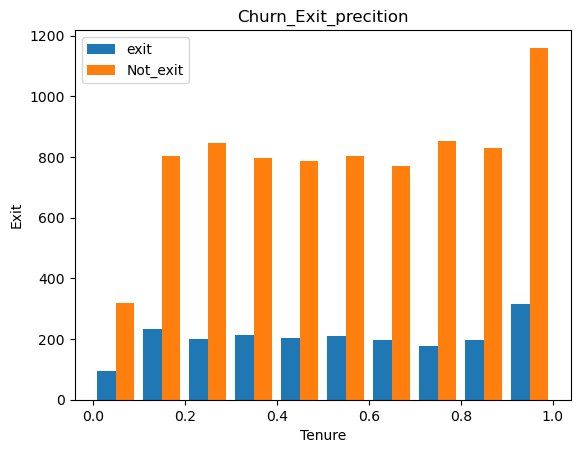

In [24]:
# Visualization : for better understanding.

import matplotlib.pyplot as plt
plt.hist([exit, not_exit], label=['exit', 'Not_exit'])
plt.legend()
plt.xlabel('Tenure')
plt.ylabel('Exit')
plt.title('Churn_Exit_precition')

In [25]:
# All set out data cleaning and visualization section successfully completed...

In [26]:
# Apply prediction using machine learning algo 

# ANN

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = df.drop('Exited', axis='columns')
y = df.Exited

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [29]:
X_train.shape

(6700, 13)

In [30]:
y_train.shape

(6700,)

In [31]:
X_test.shape

(3300, 13)

In [32]:
# apllying machine learning model...

model = keras.Sequential([
    keras.layers.Dense(200
                       , input_shape =(13,),activation = 'relu' ),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy', # binary_crossentropy because our output is binary..
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs = 10)

Epoch 1/10


C:\Users\mdhar_hxm\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 957us/step - accuracy: 0.7905 - loss: 0.5030
Epoch 2/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7992 - loss: 0.4571
Epoch 3/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - accuracy: 0.8147 - loss: 0.4336
Epoch 4/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8167 - loss: 0.4221
Epoch 5/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.8158 - loss: 0.4187
Epoch 6/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - accuracy: 0.8341 - loss: 0.3860
Epoch 7/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - accuracy: 0.8432 - loss: 0.3739
Epoch 8/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - accuracy: 0.8368 - loss: 0.3828
Epoch 9/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - accuracy: 0.8415 - loss: 0.3729
Epoch 10/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - accuracy: 0.8545 - loss: 0.3496


In [33]:
model.evaluate(X_test,y_test)

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - accuracy: 0.8538 - loss: 0.3521


[0.34624794125556946, 0.8581818342208862]

In [34]:
predi = model.predict(X_test)

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [35]:
predi[:10]

array([[0.0875902 ],
       [0.04634704],
       [0.21375464],
       [0.20612848],
       [0.05555296],
       [0.01519343],
       [0.23248275],
       [0.15375605],
       [0.30924627],
       [0.29805198]], dtype=float32)

In [36]:
# conveting 2d X_test data into 1d in range of 0-1 integer
predictions = []
for no in predi:
    if no > 0.50:
        predictions.append(1)
    else:
        predictions.append(0)
predictions[:3]

[0, 0, 0]

In [37]:
len(predictions)

3300

In [38]:
predi.shape

(3300, 1)

In [39]:
y_test.shape

(3300,)

In [40]:
y_test

6252    0
4684    0
1731    0
4742    0
4521    0
       ..
1744    0
9754    0
6094    0
8781    0
9401    1
Name: Exited, Length: 3300, dtype: int64

In [41]:
from sklearn.metrics import confusion_matrix, classification_report

In [42]:
# classification report for coparing the prediction and the actual data(X_test, y_test)/ X_test after predition
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2657
           1       0.78      0.38      0.51       643

    accuracy                           0.86      3300
   macro avg       0.82      0.68      0.71      3300
weighted avg       0.85      0.86      0.84      3300



In [43]:
print(confusion_matrix(y_test, predictions))

[[2587   70]
 [ 398  245]]


Text(95.72222222222221, 0.5, 'Truth')

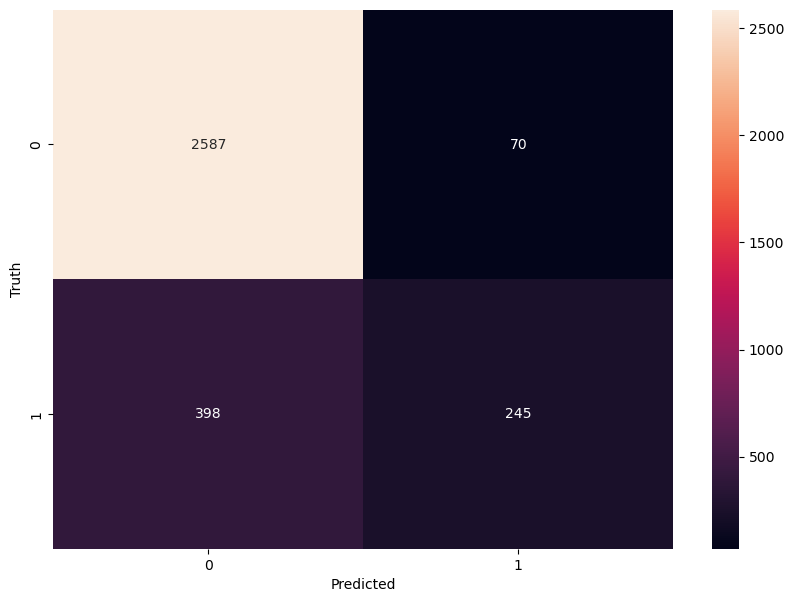

In [44]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
cm = tf.math.confusion_matrix(labels=y_test,predictions=predictions)
plt.figure(figsize = (10,7))

sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')